# Linear regression (Stochastic gradient descent)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Creating data:

In [159]:
np.random.seed(0)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1) # to mske noise on linear regression

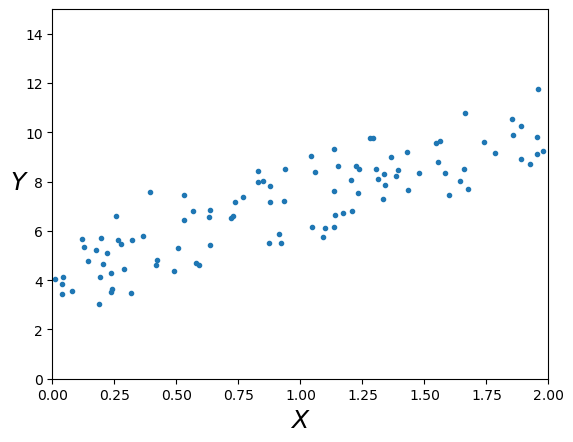

In [3]:
plt.plot(x, y, '.')
plt.xlabel('$X$', fontsize = 18)
plt.ylabel('$Y$', fontsize = 18, rotation = 0)
plt.axis([0, 2, 0, 15]);

### SGD:

In [244]:
def sgd(X, Y, epochs, l_rate):
    np.random.seed(42)
    counter = 0
    cost_list = []
    epoch_list = []
    m = len(X)
    X_b = np.append(np.ones((len(X), 1)), X, axis = 1)
    W = np.ones(shape = (X_b.shape[1], 1))
    for epoch in range(epochs):
        rand = np.random.randint(m)
        xi = X_b[rand : rand + 1]
        yi = Y[rand : rand + 1]
        gradient = 2 * xi.T.dot(xi.dot(W) - yi)
        cost = np.square(xi.dot(W) - yi)
        W = W - l_rate * gradient
        if counter%100 == 0:
            cost_list.append(float(cost))
            epoch_list.append(counter)
        counter += 1
    return W, cost, cost_list, epoch_list 
sgd(x, y, 5500, 0.01)[1], sgd(x, y, 5000, 0.01)[1],sgd(x, y, 4500, 0.01)[1]

(array([[0.36609102]]), array([[0.81016613]]), array([[2.53521089]]))

### Predection:

In [249]:
def predect(X, W = sgd(x, y, 5500, 0.01)[0]):
    X_b = np.append(np.ones((len(X), 1)), X, axis = 1)
    predections = X_b.dot(W)
    return predections

n_x = np.array([[0], [2]])
pred = predect(n_x)
pred

array([[4.0911646 ],
       [9.84815527]])

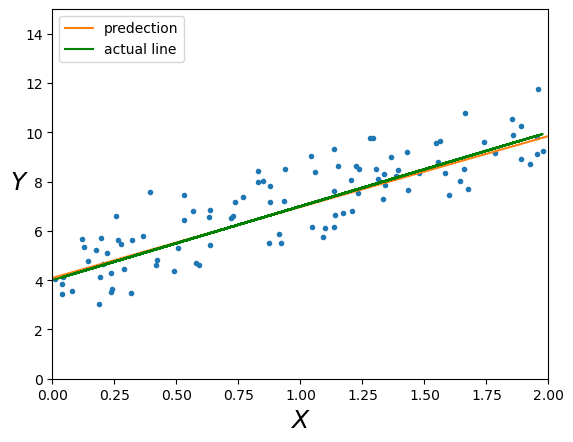

In [254]:
plt.plot(x, y, '.')
plt.plot(n_x, pred, '-', label = 'predection')
plt.plot(x, 4+3*x, 'g-', label = 'actual line')
plt.xlabel('$X$', fontsize = 18)
plt.ylabel('$Y$', fontsize = 18, rotation = 0)
plt.legend(loc = 'upper left')
plt.axis([0, 2, 0, 15]);